In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import numpy as np

In [2]:
model_only = pandas.read_csv('/home/aalvarez/Work/Projects/SourceXtractorPlusPlus/results_model_only.csv')
scale = pandas.read_csv('/home/aalvarez/Work/Projects/SourceXtractorPlusPlus/results_scale.csv')

In [3]:
def plot_vs(dataframe):
    imgs = np.unique(dataframe['Image'])
    implementations = np.unique(dataframe['Implementation'])
    nimgs = len(imgs)
    ncols = 2
    nrows = nimgs

    fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 20))

    for i, img in enumerate(imgs):
        img_sel = dataframe['Image'] == img
        w = dataframe[img_sel]['Width'].iloc[0]
        h = dataframe[img_sel]['Height'].iloc[0]
        ax_time = axes[i, 0]
        ax_mem = axes[i, 1]
        for impl in implementations:
            selection = np.logical_and(img_sel, dataframe['Implementation'] == impl)
            assert np.any(selection)
            selection = dataframe[selection]
            ax_time.plot(selection['CellSize'], selection['Time'], '-x', label=impl)
            ax_mem.plot(selection['CellSize'], selection['Memory'], '-x', label=impl)
        ax_time.set_title('Runtime {} ({}x{})'.format(img, w, h))
        ax_mem.set_title('Memory {} ({}x{})'.format(img, w, h))
        ax_time.set_xlabel('Cell size')
        ax_mem.set_xlabel('Cell size')
        ax_time.set_ylabel('Seconds')
        ax_mem.set_ylabel('MiB')
        ax_time.legend()
        ax_mem.legend()

    plt.tight_layout()
    plt.show()

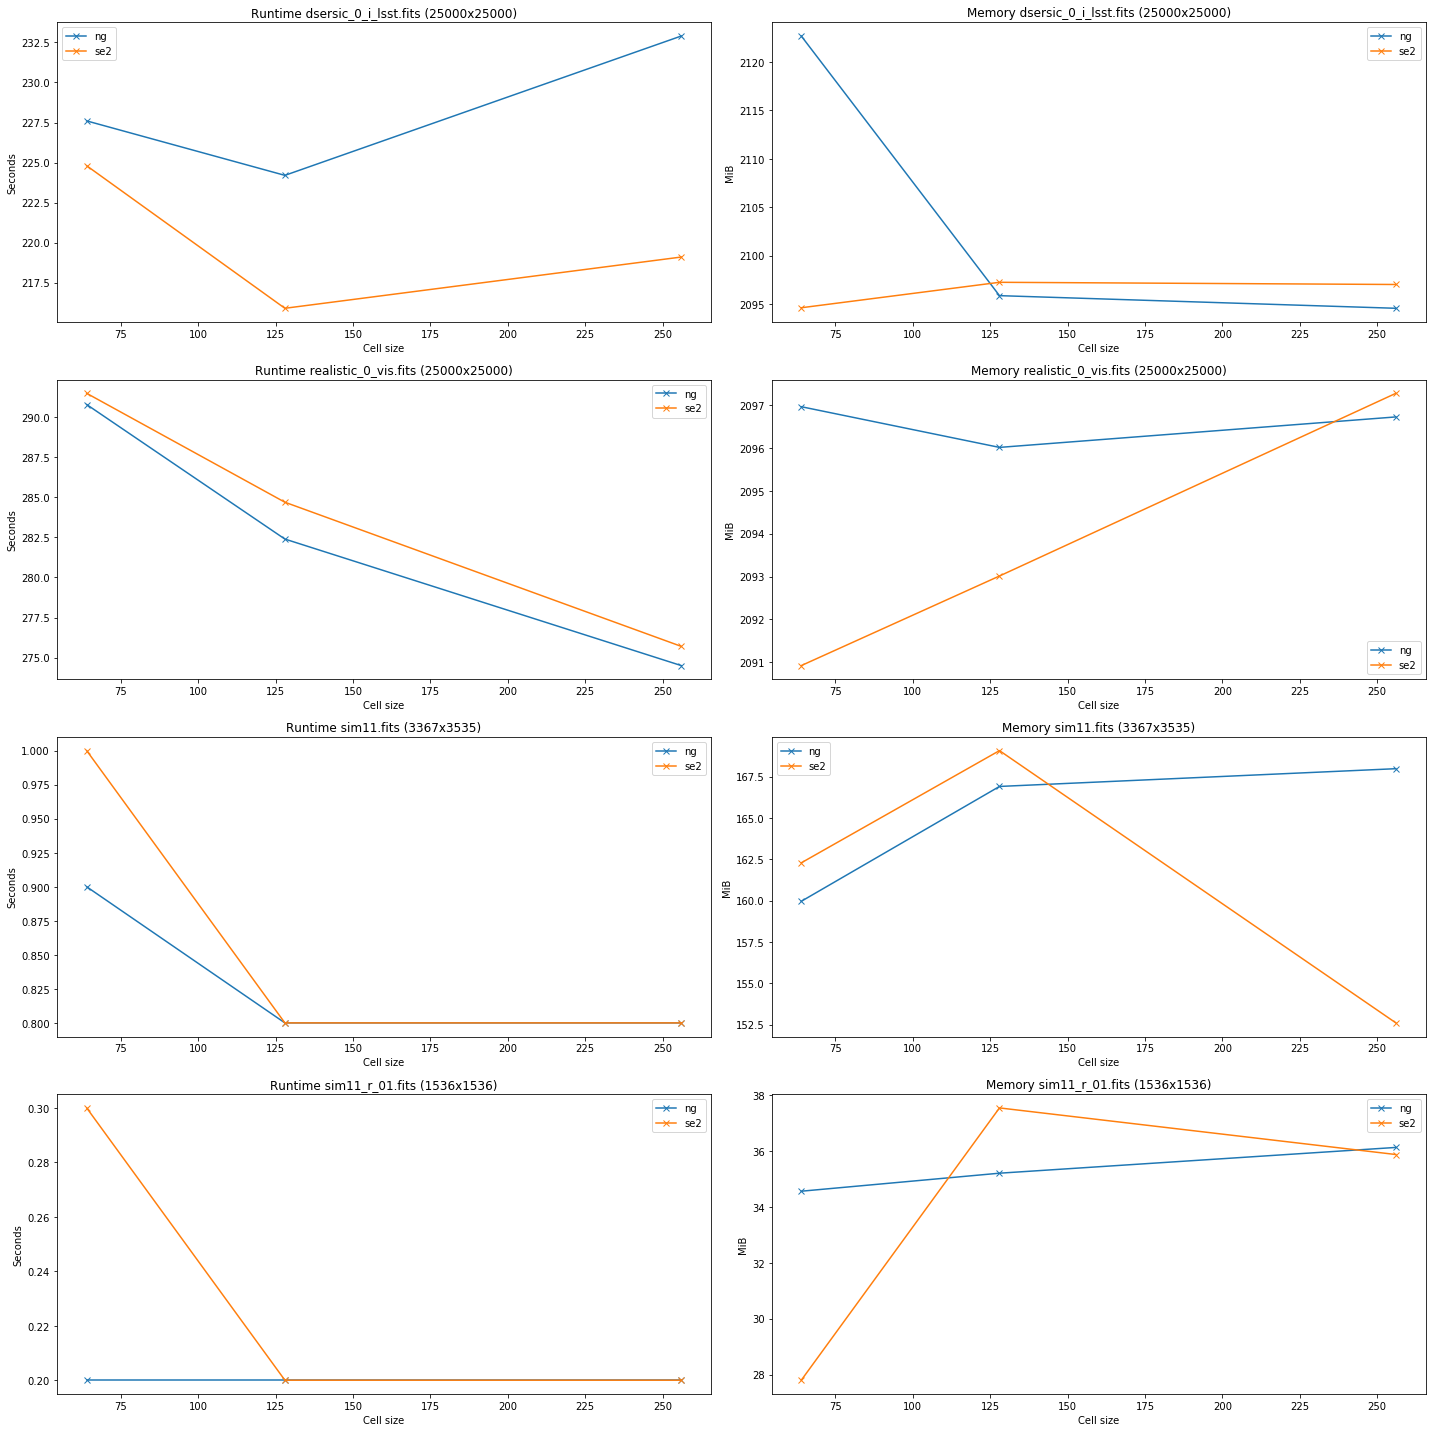

In [4]:
plot_vs(model_only)

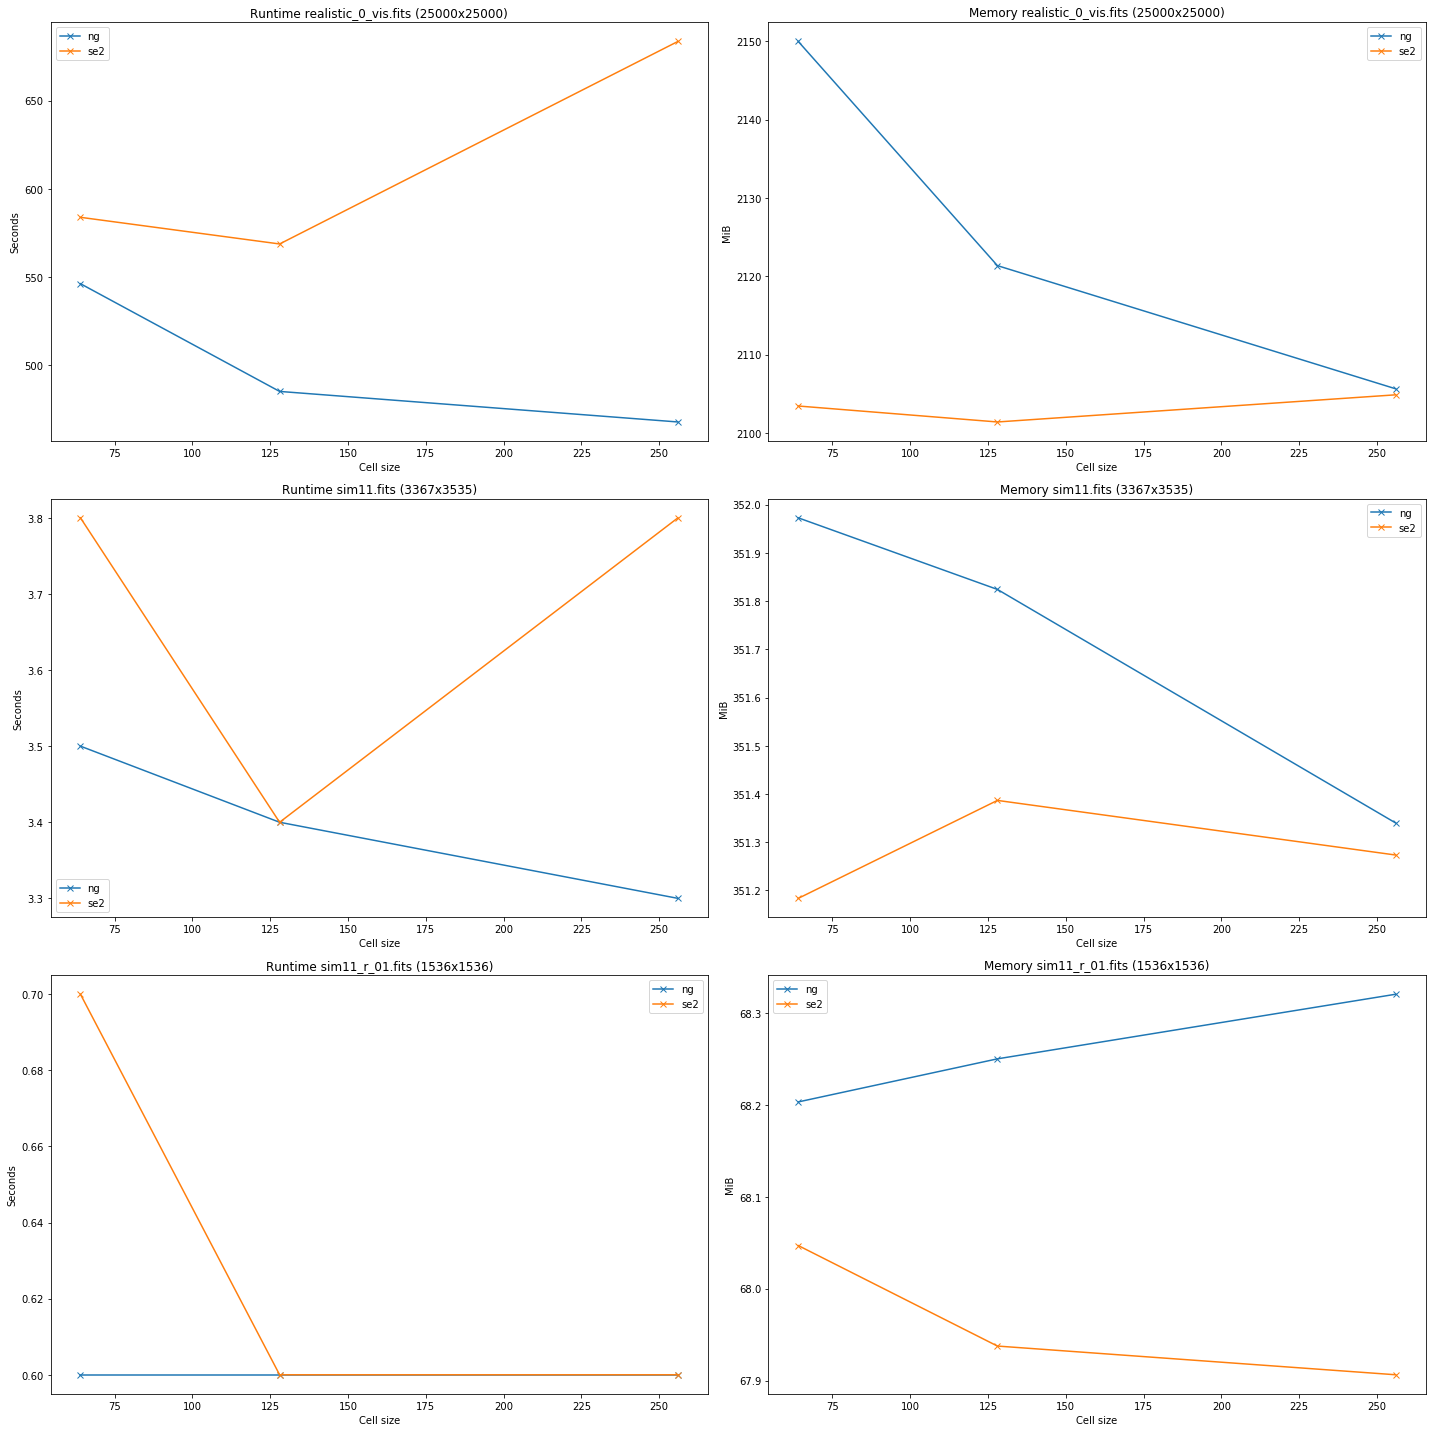

In [5]:
plot_vs(scale)